# Imports

In [198]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from tensorflow.keras.utils import plot_model
import numpy as np
import os

# Set constants

In [199]:
BATCH_SIZE = 32
IMG_SIZE = 160
EPOCHS = 20
LEARNING_RATE = 0.0005

# Preparing train and test datasets

In [200]:
PATH = '/kaggle/input/chessman-image-dataset/Chessman-image-dataset'
dir = os.path.join(PATH, 'Chess')

dataset = tf.keras.utils.image_dataset_from_directory(dir,
                                                      shuffle=True,
                                                      batch_size=BATCH_SIZE,
                                                      image_size=(IMG_SIZE, IMG_SIZE))

batches = tf.data.experimental.cardinality(dataset)

test_dataset = dataset.take(batches // 5)
train_dataset = dataset.skip(batches // 5)

test_batches = tf.data.experimental.cardinality(test_dataset)

validation_dataset = test_dataset.take(test_batches // 2)
test_dataset = test_dataset.skip(test_batches // 2)

Found 552 files belonging to 6 classes.


# Show dataset

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


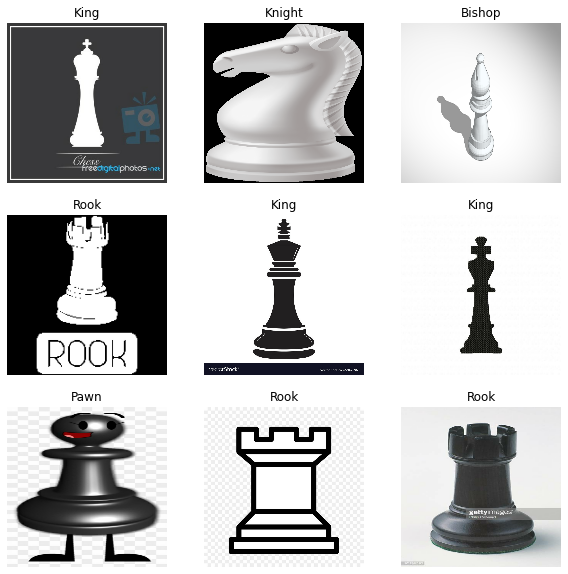

In [201]:
class_names = dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Configure the dataset for performance

In [202]:
AUTOTUNE = tf.data.AUTOTUNE

def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_dataset = configure_for_performance(train_dataset)
validation_dataset = configure_for_performance(validation_dataset)

# Defining Classification Model

In [203]:
data_augmentation =  tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom((-0.1,0.1)),
    tf.keras.layers.RandomContrast(0.05),  
    tf.keras.layers.RandomTranslation(0.1,0.1)
])

def CNN_model(num_classes):
    input_ = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3,))
#     x = data_augmentation(input_)
    x = tf.keras.layers.Rescaling(1./255)(input_)
    x = tf.keras.layers.Conv2D(16,3,padding='same',activation='relu')(x)
    x = tf.keras.layers.MaxPool2D()(x)
    x = tf.keras.layers.Conv2D(32,3,padding='same',activation='relu')(x)
    x = tf.keras.layers.MaxPool2D()(x)
    x = tf.keras.layers.Dropout(.2)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128,activation='relu')(x)
    output_ = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    return tf.keras.models.Model(input_, output_, name='CNN_model')

num_classes = len(class_names)
model = CNN_model(num_classes)
model.summary()


#     x = tf.keras.layers.Conv2D(64,3,padding='same',activation='relu')(x)
#     x = tf.keras.layers.MaxPool2D()(x)


Model: "CNN_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 160, 160, 3)]     0         
_________________________________________________________________
rescaling_15 (Rescaling)     (None, 160, 160, 3)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 160, 160, 16)      448       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 80, 80, 32)        4640      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 40, 40, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 40, 40, 32)        0 

# View block diagram of the model

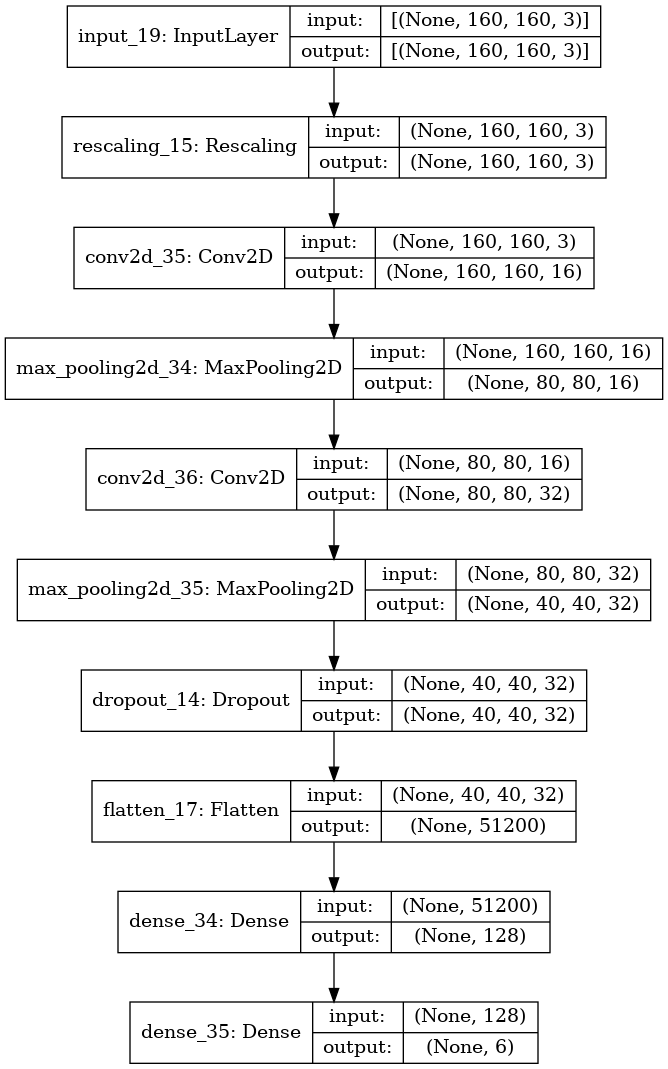

In [204]:
plot_model(model, show_shapes=True, expand_nested=True)

# Model compile

In [205]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

history = model.fit(train_dataset, epochs=EPOCHS, validation_data=validation_dataset)


Epoch 1/20


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

15/15 [==============================] - ETA: 0s - loss: 3.5634 - accuracy: 0.1623

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


15/15 [==============================] - 7s 239ms/step - loss: 3.5634 - accuracy: 0.1623 - val_loss: 1.7132 - val_accuracy: 0.3438


Cleanup called...
Cleanup called...


Epoch 2/20
15/15 [==============================] - 2s 155ms/step - loss: 1.8457 - accuracy: 0.1952 - val_loss: 1.6485 - val_accuracy: 0.4062
Epoch 3/20
15/15 [==============================] - 2s 151ms/step - loss: 1.7071 - accuracy: 0.2939 - val_loss: 1.5235 - val_accuracy: 0.4062
Epoch 4/20
15/15 [==============================] - 2s 148ms/step - loss: 1.5505 - accuracy: 0.4452 - val_loss: 1.4597 - val_accuracy: 0.4375
Epoch 5/20
15/15 [==============================] - 2s 148ms/step - loss: 1.4230 - accuracy: 0.5197 - val_loss: 1.2903 - val_accuracy: 0.6875
Epoch 6/20
15/15 [==============================] - 3s 196ms/step - loss: 1.2487 - accuracy: 0.5680 - val_loss: 1.1352 - val_accuracy: 0.5938
Epoch 7/20
15/15 [==============================] - 2s 153ms/step - loss: 1.0876 - accuracy: 0.6425 - val_loss: 1.0747 - val_accuracy: 0.6562
Epoch 8/20
15/15 [==============================] - 2s 149ms/step - loss: 0.9278 - accuracy: 0.7083 - val_loss: 0.9890 - val_accuracy: 0.6875
Epoch 

# Evaluate models

In [206]:
metrics = model.evaluate(test_dataset, batch_size=BATCH_SIZE, verbose=2)
metric_names = ['Test loss', 'Test accuracy']

for name, value in zip(metric_names, metrics):
    print(f'{name} : {value}')

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


2/2 - 2s - loss: 0.7266 - accuracy: 0.7656


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Test loss : 0.7265876531600952
Test accuracy : 0.765625


Cleanup called...


# Plotting train, test losses and accuracy

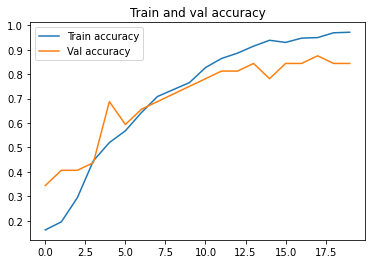

<Figure size 7200x7200 with 0 Axes>

In [207]:
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val accuracy')
plt.title('Train and val accuracy')
plt.legend()
plt.figure(figsize = (100,100))
plt.show()

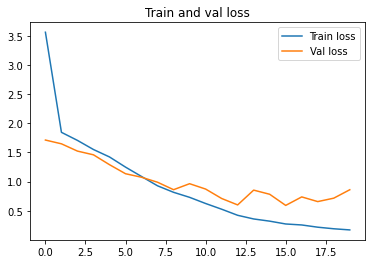

<Figure size 14400x14400 with 0 Axes>

In [208]:
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Val loss')
plt.title('Train and val loss')
plt.legend()
plt.figure(figsize = (200,200))
plt.show()